

![Image](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse1.mm.bing.net%2Fth%3Fid%3DOIP.OqOqL3uDYg7ab_SPIjiPpAHaHa%26pid%3DApi&f=1&ipt=6f7a3c3e03fb8d9d0b7bd50d3a803b734a30cc164d14ae6fef2b02778b4f7f2c&ipo=images)


Team Members:


1.   Spencer Beer
2.   Matt Smith

# Project Introduction

**Introduction:**

The project we worked on is an image classification project focused on the recognition and classification of different bird species using convolutional neural networks (CNNs). As stated below, our dataset will have 525 features, so we chose neural networks for our classification problem, as they do the best in classifying text and images.
By fine tuning our training models hyperparameters, such as number of layers and neurons, optimizers, and initializers, we created a highly accurate classifier that can determine the species of many birds.

**Dataset Information:**

The dataset that we train, validated, and tested our model with is the "Birds 525 Species - Image Classification" dataset found on kaggle: [Link to dataset](https://www.kaggle.com/datasets/gpiosenka/100-bird-species/code). It contains almost 90,000 images of 525 different species of birds. The training set includes 84,635 images, and the test and validation include 2625 images each. Each image is a 224X224X3 .jpg file.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.utils.class_weight import compute_class_weight
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input, decode_predictions
import random
import os
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

# Data Preprocessesing
This is our preprocessing section. In this section we imported our data, and read it into a usable format to train our model.

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


## 1. Define paths and parameters


In [ ]:
import zipfile
matt_path = '/content/drive/MyDrive/PROJECT CS345/'
spencer_path = '/content/drive/MyDrive/Colab Notebooks/CS 345/PROJECT CS345/'

In [ ]:
with zipfile.ZipFile(spencer_path + 'archive.zip', 'r') as zip_ref: # edit path
    zip_ref.extractall('/content')

In [ ]:
train_path = "/content/train"
test_path = "/content/test"
valid_path = "/content/valid"
csv_path = "/content/birds.csv"

In [ ]:
birds_df = pd.read_csv(csv_path)

## 2. Show examples

Data Split

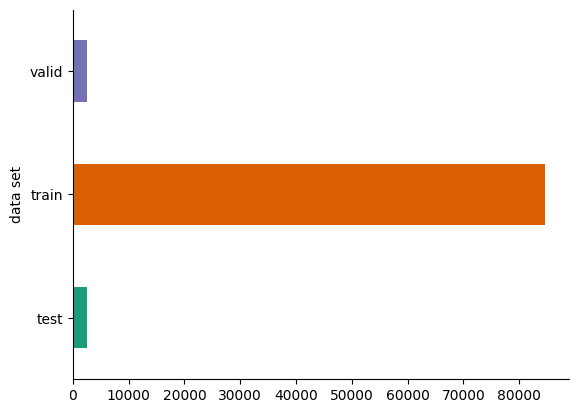

In [ ]:
birds_df.groupby('data set').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Even Data Distribution

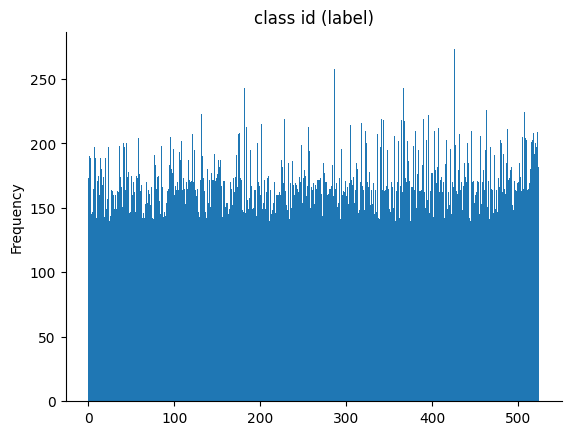

In [ ]:
birds_df['class id'].plot(kind='hist', bins=525, title='class id (label)')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Shuffle
shuffled_birds_df = birds_df.sample(frac=1).reset_index(drop=True)
shuffled_birds_df.head(10)

,class id,filepaths,labels,data set,scientific name
0,387.0,train/PURPLE MARTIN/018.jpg,PURPLE MARTIN,train,PROGNE SUBIS
1,524.0,valid/BLACK BREASTED PUFFBIRD/3.jpg,BLACK BREASTED PUFFBIRD,valid,NOTHARCHUS PECTORALIS
2,374.0,train/PARUS MAJOR/118.jpg,PARUS MAJOR,train,PARUS MAJOR
3,100.0,train/BLUE THROATED TOUCANET/043.jpg,BLUE THROATED TOUCANET,train,AULACORHYNCHUS CAERULEOGULARIS
4,257.0,train/GREATOR SAGE GROUSE/080.jpg,GREATOR SAGE GROUSE,train,CENTROCERCUS UROPHASIANUS
5,505.0,train/WILLOW PTARMIGAN/014.jpg,WILLOW PTARMIGAN,train,LAGOPUS LAGOPUS
6,327.0,train/LUCIFER HUMMINGBIRD/114.jpg,LUCIFER HUMMINGBIRD,train,CALOTHORAX LUCIFER
7,317.0,train/LARK BUNTING/052.jpg,LARK BUNTING,train,CALAMOSPIZA MELANOCORYS
8,234.0,train/GO AWAY BIRD/127.jpg,GO AWAY BIRD,train,CORYTHAIXOIDES CONCOLOR
9,223.0,train/FIRE TAILLED MYZORNIS/078.jpg,FIRE TAILLED MYZORNIS,train,MYZORNIS PYRRHOURA


# Data Pipline Section

This code is using TensorFlow's `ImageDataGenerator` and `image_dataset_from_directory` functions to create datasets for training, testing, and validation of a deep learning model, likely a convolutional neural network (CNN) for image classification.

Here's a breakdown of the code:

1. **Setting Image Size:**
   ```python
   image_size = 224
   ```
   The variable `image_size` is set to 224, indicating that the images will be resized to a square of size 224x224 pixels. This is a common size used in many pre-trained CNN models.

2. **Training Dataset:**
   ```python
   train_dataset = tf.keras.utils.image_dataset_from_directory(
       train_path,
       labels="inferred",
       label_mode="categorical",
       image_size=(image_size, image_size),
       batch_size=32,
       shuffle=True,
       seed=42
   )
   ```
   - `train_path` is the directory path containing the training images.
   - `labels="inferred"` implies that the labels will be inferred from the directory structure.
   - `label_mode="categorical"` indicates that the labels are in categorical format (one-hot encoded).
   - `image_size=(image_size, image_size)` specifies the size to which the images will be resized.
   - `batch_size=32` sets the number of images in each batch.
   - `shuffle=True` shuffles the training data, which is common practice to avoid the model learning the order of the data.
   - `seed=42` sets the random seed for reproducibility.

3. **Test Dataset:**
   ```python
   test_dataset = tf.keras.utils.image_dataset_from_directory(
       test_path,
       labels="inferred",
       label_mode="categorical",
       image_size=(image_size, image_size),
       batch_size=32,
       shuffle=False
   )
   ```
   Similar to the training dataset, but `shuffle=False` because you typically don't shuffle test data.

4. **Validation Dataset:**
   ```python
   valid_dataset = tf.keras.utils.image_dataset_from_directory(
       valid_path,
       labels="inferred",
       label_mode="categorical",
       image_size=(image_size, image_size),
       batch_size=32,
       shuffle=False
   )
   ```
   Similar to the test dataset, used for validation during the model training process.

In [ ]:
image_size = 224
# ImageDataGenerator for training data
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    image_size=(image_size, image_size),
    batch_size=32,
    shuffle=True,
    seed=42
)

# ImageDataGenerator for test and validation data
test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_path,
    labels="inferred",
    label_mode="categorical",
    image_size=(image_size, image_size),
    batch_size=32,
    shuffle=False
)

valid_dataset = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    image_size=(image_size, image_size),
    batch_size=32,
    shuffle=False
)

Found 84635 files belonging to 525 classes.
Found 2625 files belonging to 525 classes.
Found 2625 files belonging to 525 classes.


# Model Training
This section includes all the code we used to train our model. It includes two graphs that show the model loss and accuracy over each epoch as it was being trained.

The following cell contains all the hyperparameters that we used to find the highest accuracy model. It also contains variables to store the different combinations of hyperparameters that we tested and their respective accuracies.
Because neural networks weren't covered in class, we wanted to research them and use them in our model to one, make it more accurate, and two, understand their effect in neural networks.

In [ ]:
optimizer = 'adam'
kernel_initializer = 'glorot_normal'
size_of_dense = 512 # neurons
dropout = 0.4 # for regularization
epochs = 20

## The function below is used later on in the notebook to plot the training and validation accuracy history with matplotlib

In [ ]:
def plot_training_history(history):
    # Create a 2x1 subplot grid
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

    # Plot training and validation accuracy
    ax1.plot(history.history['accuracy'], label='Train Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title('Model Accuracy')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.legend()

    # Plot training and validation loss
    ax2.plot(history.history['loss'], label='Train Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_title('Model Loss')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend()

    # Adjust layout to prevent clipping of titles
    plt.tight_layout()

    # Show the plot
    plt.show()

## Pull the EfficientNETV2S model from the keras model zoo and freeze the last layer for training

In [ ]:
base_model = tf.keras.applications.EfficientNetV2S(
    include_top=False, # for adding 525 last layer
    weights="imagenet", # pretrained on imagenet
    input_shape=(image_size, image_size, 3),
    pooling=None,
    classifier_activation="softmax",
    include_preprocessing=True,
)

# Freeze the layers of the pre-trained model
base_model.trainable = False

82420632/82420632 [==============================] - 4s 0us/step


## Fine tuning the model

In [ ]:
model = Sequential([
    base_model, # efficient net
    layers.GlobalAveragePooling2D(), # reduce spatial dimensions
    layers.Dense(size_of_dense, activation='relu', kernel_initializer=kernel_initializer), # learning weights of birds
    layers.Dropout(dropout),  # add dropout for regularization
    layers.Dense(525, activation='softmax') # 525 outputs (for 525 birds)
])

## Compiling the frozen for training through keras

In [ ]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

## An ineffective model for comparison

In [ ]:
model_without_efficient_backbone = Sequential([
    layers.GlobalAveragePooling2D(),
    layers.Dense(size_of_dense, activation='relu', kernel_initializer=kernel_initializer),
    layers.Dropout(dropout),  # Add dropout for regularization
    layers.Dense(525, activation='softmax')
])

In [ ]:
model_without_efficient_backbone.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model_without_efficient_backbone.fit(train_dataset, epochs=epochs, validation_data=valid_dataset, verbose=1);

Epoch 1/20
2645/2645 [==============================] - 31s 12ms/step - loss: 5.9104 - accuracy: 0.0126 - val_loss: 5.8592 - val_accuracy: 0.0137
Epoch 2/20
2645/2645 [==============================] - 31s 12ms/step - loss: 5.9124 - accuracy: 0.0123 - val_loss: 5.8339 - val_accuracy: 0.0156
Epoch 3/20
2645/2645 [==============================] - 31s 12ms/step - loss: 5.9053 - accuracy: 0.0120 - val_loss: 5.8189 - val_accuracy: 0.0175
Epoch 4/20
2645/2645 [==============================] - 31s 12ms/step - loss: 5.9053 - accuracy: 0.0126 - val_loss: 5.8232 - val_accuracy: 0.0175
Epoch 5/20
2645/2645 [==============================] - 30s 11ms/step - loss: 5.9052 - accuracy: 0.0126 - val_loss: 5.8159 - val_accuracy: 0.0156
Epoch 6/20
2645/2645 [==============================] - 31s 12ms/step - loss: 5.9039 - accuracy: 0.0129 - val_loss: 5.8458 - val_accuracy: 0.0141
Epoch 7/20
2645/2645 [==============================] - 30s 11ms/step - loss: 5.9039 - accuracy: 0.0127 - val_loss: 5.8472 -

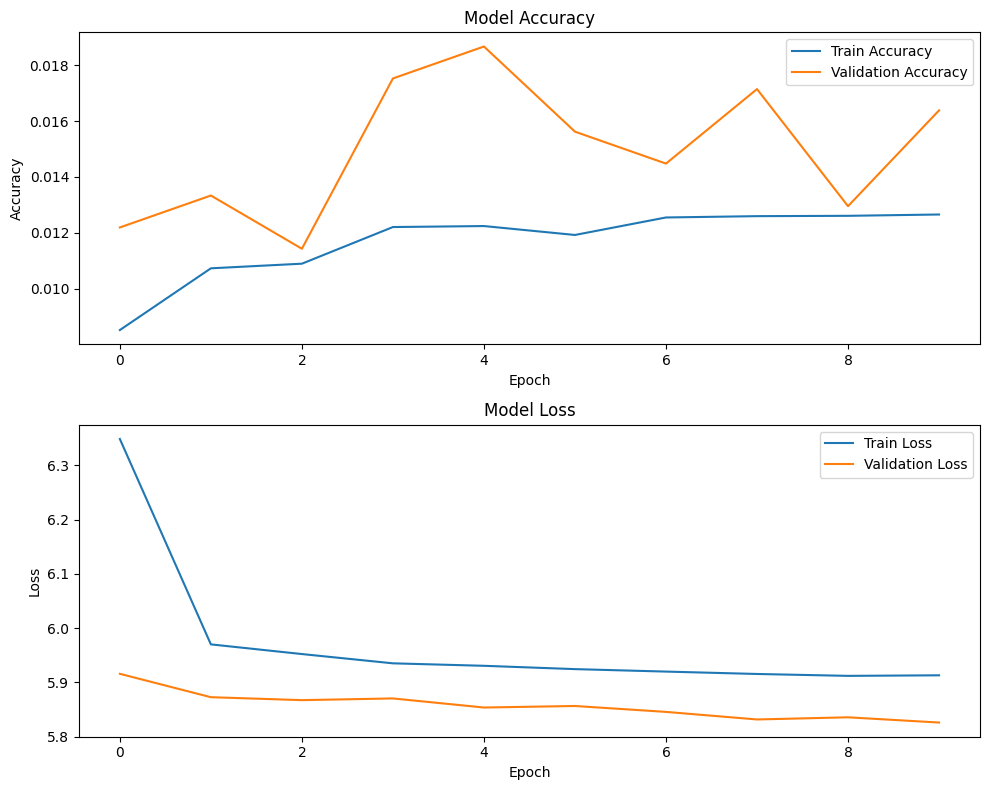

In [ ]:
plot_training_history(history)

## Terrible right? Let's try adding a pretrained model from the keras model zoo as described above and fine-tune it for our bird classifcation case (also shown earlier)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(train_dataset, epochs=epochs, validation_data=valid_dataset, verbose=1, callbacks=[early_stopping])

Epoch 1/20
2645/2645 [==============================] - 159s 60ms/step - loss: 0.8685 - accuracy: 0.7581 - val_loss: 0.3448 - val_accuracy: 0.8968
Epoch 2/20
2645/2645 [==============================] - 154s 58ms/step - loss: 0.5905 - accuracy: 0.8335 - val_loss: 0.2724 - val_accuracy: 0.9242
Epoch 3/20
2645/2645 [==============================] - 153s 58ms/step - loss: 0.4939 - accuracy: 0.8593 - val_loss: 0.2386 - val_accuracy: 0.9261
Epoch 4/20
2645/2645 [==============================] - 153s 58ms/step - loss: 0.4456 - accuracy: 0.8713 - val_loss: 0.2486 - val_accuracy: 0.9261
Epoch 5/20
2645/2645 [==============================] - 153s 58ms/step - loss: 0.4063 - accuracy: 0.8812 - val_loss: 0.2473 - val_accuracy: 0.9269
Epoch 6/20
2645/2645 [==============================] - 153s 58ms/step - loss: 0.3841 - accuracy: 0.8881 - val_loss: 0.2283 - val_accuracy: 0.9368
Epoch 7/20
2645/2645 [==============================] - 153s 58ms/step - loss: 0.3644 - accuracy: 0.8943 - val_loss: 0

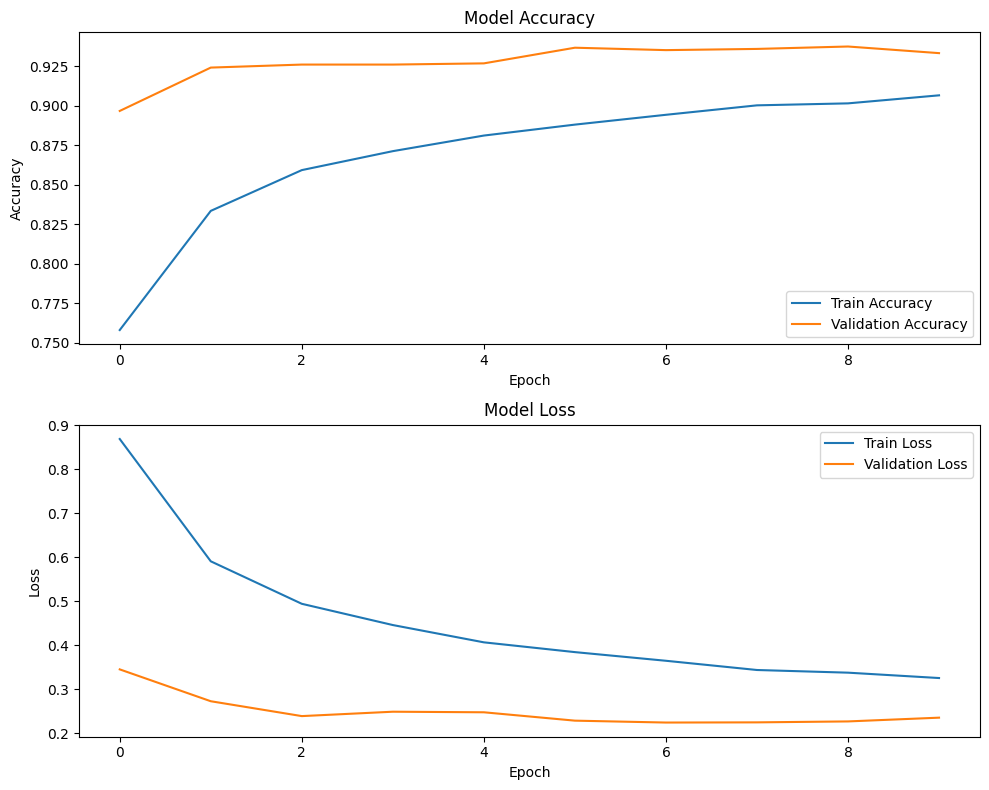

In [ ]:
plot_training_history(history)

## ... That's better

In [ ]:
# Save the model for later use
model_name = input("Give the model a reasonable name --> ")
dir_to_save = input("Where are we saving this model to? --> ")
model.save(f'{dir_to_save}{model_name}.h5');

Give the model a reasonable name --> birdnetv2s224x224-2
Where are we saving this model to? --> /content/drive/MyDrive/Colab Notebooks/CS 345/PROJECT CS345/Models


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Load the model
model_full_path = input("Use to load a model. Directory is --> ")
model = tf.keras.models.load_model(model_full_path)

# Model Summary

In [ ]:
plot_model(base_model, show_shapes=True, show_layer_names=True)

Output hidden; open in https://colab.research.google.com to view.

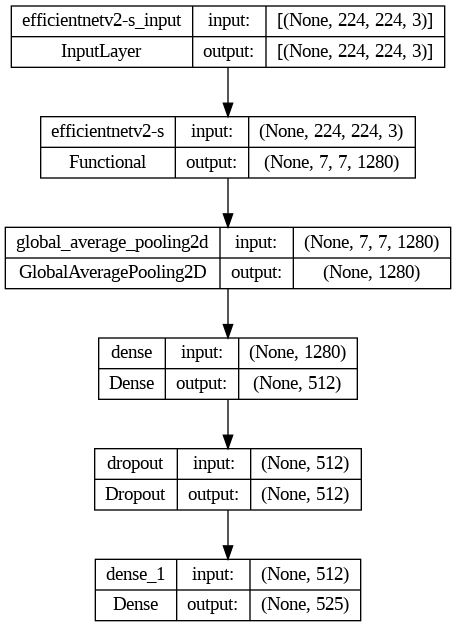

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

# Model Testing
This section includes testing the best and final model's accuracy with the test set, and visuals to test how it performs.

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset)

# Display the evaluation results
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

83/83 [==============================] - 5s 55ms/step - loss: 0.1342 - accuracy: 0.9611
Test Loss: 0.1342385858297348
Test Accuracy: 96.11%


In [ ]:
def plot_predictions(model, test_dataset, num_predictions=20, num_cols=5, figsize=(15, 15)):
    image_index = 0
    num_rows = (num_predictions + num_cols - 1) // num_cols
    correct_predictions = 0

    fig, ax = plt.subplots(num_rows, num_cols, figsize=figsize)

    for images, labels in test_dataset.take(num_predictions):
        # Choose a random image from the batch
        random_index = random.randint(0, len(images) - 1)
        img = images[random_index]
        true_label = labels[random_index]

        # Expand the dimensions to match the expected shape
        img_array = np.expand_dims(img.numpy(), axis=0)
        img_array = preprocess_input(img_array)  # Assuming you have defined preprocess_input function

        # Make predictions
        predictions = model.predict(img_array)
        predicted_label_index = np.argmax(predictions)

        # Check if the prediction is correct
        if predicted_label_index == np.argmax(true_label):
            correct_predictions += 1

        # Display the image, true label, and predicted label
        row_index = image_index // num_cols
        col_index = image_index % num_cols

        ax[row_index, col_index].imshow(img.numpy().astype(np.uint8))

        # Use set_title instead of title
        ax[row_index, col_index].set_title(f"True Label: {test_dataset.class_names[np.argmax(true_label)]}\nPredicted Label: {test_dataset.class_names[predicted_label_index]}", fontsize=8)

        # Increment image_index
        image_index += 1

    # Hide empty subplots
    for i in range(image_index, num_rows * num_cols):
        row_index = i // num_cols
        col_index = i % num_cols
        ax[row_index, col_index].axis('off')

    plt.show()

    # Compute and return accuracy
    accuracy = correct_predictions / num_predictions
    return accuracy

The following provides a visual summary of the model's predictions on multiple subsets of the test dataset, aiding in the qualitative assessment of the model's performance. The accuracy metric offers a quantitative measure alongside the visual representation.

In [ ]:
num_bars = 10
accuracies = [plot_predictions(model, test_dataset) for accuracy in range(num_bars)]

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print([accuracy for accuracy in accuracies])

[1.0, 0.85, 0.9, 0.8, 0.95, 0.9, 0.95, 1.0, 1.0, 1.0]


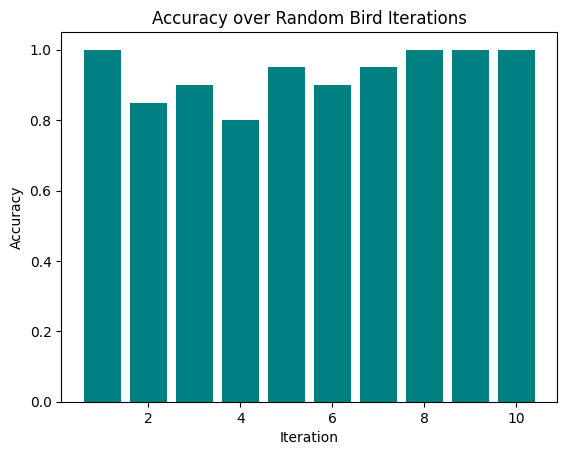

In [ ]:
x_values = range(1, len(accuracies) + 1)

plt.bar(x_values, accuracies, color='teal')

plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy over Random Bird Iterations')

plt.show()

# Tested model hyperparameters



    # accuracy : hyperparameter combos
    0.9375     : {size_of_dense : 256, dropout : 0.5, epochs : 10, kernel_initializer : 'glorot_normal', optimizer : "adam", image_size : 150},
    0.9246     : {size_of_dense : 128, dropout : 0.5, epochs : 10, kernel_initializer : 'glorot_normal', optimizer : "adam", image_size : 150},
    0.9390     : {size_of_dense : 256, dropout : 0.3, epochs : 10, kernel_initializer : 'glorot_normal', optimizer : "adam", image_size : 150},
    0.9341     : {size_of_dense : 256, dropout : 0.2, epochs : 10, kernel_initializer : 'glorot_normal', optimizer : "adam", image_size : 150},
    0.9463     : {size_of_dense : 512, dropout : 0.3, epochs : 10, kernel_initializer : 'glorot_normal', optimizer : "adam", image_size : 150},
    0.9360     : {size_of_dense : 512, dropout : 0.3, epochs : 15, kernel_initializer : 'glorot_normal', optimizer : "adam", image_size : 150},
    0.9379     : {size_of_dense : 512, dropout : 0.2, epochs : 10, kernel_initializer : 'glorot_normal', optimizer : "adam", image_size : 150},
    0.9371     : {size_of_dense : 1024, dropout : 0.2, epochs : 10, kernel_initializer : 'glorot_normal', optimizer : "adam", image_size : 150},
    0.9379     : {size_of_dense : 1024, dropout : 0.3, epochs : 10, kernel_initializer : 'glorot_normal', optimizer : "adam", image_size : 150},
    0.9669     : {size_of_dense : 512, dropout : 0.3, epochs : 10, kernel_initializer : 'glorot_normal', optimizer : "adam", image_size : 224}
